# one hot encodding for multi categorical variabel

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

In [24]:
dataset =pd.read_csv("test.csv")
dataset.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [25]:
# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

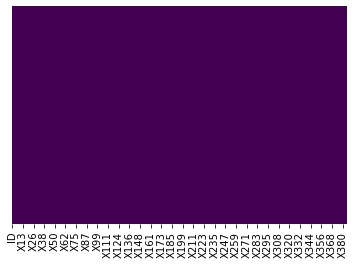

In [27]:
#in see which columns missing values present
sns.heatmap(dataset.isnull(),yticklabels =False,cbar =False,cmap ='viridis')

In [34]:
dataset.shape

(4209, 377)

In [93]:
data =dataset.copy()
data =data.iloc[:,1:9]
data.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m


In [94]:
for col in data.columns:
    print(col ,": ", len(data[col].unique()), "label")

X0 :  49 label
X1 :  27 label
X2 :  45 label
X3 :  7 label
X4 :  4 label
X5 :  32 label
X6 :  12 label
X8 :  25 label


In [96]:
pd.get_dummies(data,drop_first =True).shape

(4209, 193)

In [97]:
x2 =data.X2.value_counts().sort_values(ascending =False).head(20)
x2

as    1658
ae     478
ai     462
m      348
ak     260
r      155
n      113
s      100
f       85
e       84
ay      78
aq      72
a       44
b       38
k       25
t       25
ag      23
ac      20
ao      19
i       15
Name: X2, dtype: int64

In [98]:
top_10 =[x for x in data.X2.value_counts().sort_values(ascending =False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [106]:
for label in top_10:
    data[label] =np.where(data['X2']==label,1,0)

data[['X2']+top_10].head(40)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,n,0,0,0,0,0,0,1,0,0,0
1,ai,0,0,1,0,0,0,0,0,0,0
2,as,1,0,0,0,0,0,0,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,as,1,0,0,0,0,0,0,0,0,0
5,ai,0,0,1,0,0,0,0,0,0,0
6,ae,0,1,0,0,0,0,0,0,0,0
7,ae,0,1,0,0,0,0,0,0,0,0
8,s,0,0,0,0,0,0,0,1,0,0
9,as,1,0,0,0,0,0,0,0,0,0


In [108]:
def one_hot_top_X(df,variable,top_x_labels):
    
    for label in top_x_labels:
        df[variable+'_'+label] =np.where(data[variable]==label,1,0)
data =pd.read_csv("test.csv",usecols=['X0','X1','X2','X3','X4','X5','X6','X8'])

one_hot_top_X(data,'X2',top_10)
data.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,az,v,n,f,d,t,a,w,0,0,0,0,0,0,1,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,1,0,0,0,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,0,0,0,0,1,0,0,0
4,w,s,as,c,d,y,i,m,1,0,0,0,0,0,0,0,0,0


In [112]:
def one_hotencoding_mul(df,variable,top_x_labels):
    
    for label in top_x_labels:
        df[variable+'_'+label] =np.where(data[variable]==label,1,0)
data =pd.read_csv("test.csv",usecols=['X0','X1','X2','X3','X4','X5','X6','X8'])

one_hot_top_X(data,'X0',top_10)
data.head()


,X0,X1,X2,X3,X4,X5,X6,X8,X0_as,X0_ae,X0_ai,X0_m,X0_ak,X0_r,X0_n,X0_s,X0_f,X0_e
0,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,0,0,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,0,0,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,0,0,0,0,0,0,0,0


In [113]:
def one_hot_top_X(df,variable,top_x_labels):
    
    for label in top_x_labels:
        df[variable+'_'+label] =np.where(data[variable]==label,1,0)
data =pd.read_csv("test.csv",usecols=['X0','X1','X2','X3','X4','X5','X6','X8'])

one_hot_top_X(data,'X1',top_10)
data.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X1_as,X1_ae,X1_ai,X1_m,X1_ak,X1_r,X1_n,X1_s,X1_f,X1_e
0,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,0,0,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,0,0,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,0,0,0,0,0,1,0,0


In [125]:
a =one_hot_top_X(data,'X0',top_10)
b =one_hot_top_X(data,'X1',top_10)
c =one_hot_top_X(data,'X2',top_10)
d =one_hot_top_X(data,'X3',top_10)
e =one_hot_top_X(data,'X4',top_10)
f =one_hot_top_X(data,'X5',top_10)
g =one_hot_top_X(data,'X6',top_10)
h =one_hot_top_X(data,'X8',top_10)

None


In [128]:
data.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X1_as,X1_ae,X1_ai,X1_m,X1_ak,X1_r,X1_n,X1_s,X1_f,X1_e,X0_as,X0_ae,X0_ai,X0_m,X0_ak,X0_r,X0_n,X0_s,X0_f,X0_e,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e,X3_as,X3_ae,X3_ai,X3_m,X3_ak,X3_r,X3_n,X3_s,X3_f,X3_e,X4_as,X4_ae,X4_ai,X4_m,X4_ak,X4_r,X4_n,X4_s,X4_f,X4_e,X5_as,X5_ae,X5_ai,X5_m,X5_ak,X5_r,X5_n,X5_s,X5_f,X5_e,X6_as,X6_ae,X6_ai,X6_m,X6_ak,X6_r,X6_n,X6_s,X6_f,X6_e,X8_as,X8_ae,X8_ai,X8_m,X8_ak,X8_r,X8_n,X8_s,X8_f,X8_e
0,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,w,s,as,c,d,y,i,m,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# handling the categorical feature many catrgotical(cout/frequny encoding)

In [78]:
data =pd.read_csv("test.csv")
data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,

In [79]:
data =data.iloc[:,1:3]

In [80]:
for col in data.columns:
    print(col ,": ", len(data[col].unique()), "label")

X0 :  49 label
X1 :  27 label


In [81]:
pd.get_dummies(data,drop_first =True).shape

(4209, 74)

In [104]:
x0 =data.X0.value_counts()


In [85]:
x1 =data.X1.value_counts()
x1

aa    826
s     602
l     599
b     596
v     436
r     252
i     189
a     153
c     142
o      81
w      50
u      40
z      31
e      29
h      27
m      27
j      22
y      21
t      18
n      16
k      12
f      12
p      10
g       9
ab      5
q       3
d       1
Name: X1, dtype: int64

In [106]:
X0 =data.X0.replace(x0)
X0

0       161
1       293
2       161
3       161
4       198
       ... 
4204    162
4205    293
4206    348
4207    432
4208    293
Name: X0, Length: 4209, dtype: int64

In [96]:
X1 =data.X1.replace(x1)
X1

0       436
1       596
2       436
3       599
4       602
       ... 
4204     27
4205    826
4206    436
4207    436
4208    826
Name: X1, Length: 4209, dtype: int64

In [116]:
pd.DataFrame(X0)

,X0
0,161
1,293
2,161
3,161
4,198
...,...
4204,162
4205,293
4206,348
4207,432


In [119]:
df = pd.DataFrame({'X0': X0, 'X1': X1})
df

,X0,X1
0,161,436
1,293,596
2,161,436
3,161,599
4,198,602
...,...,...
4204,162,27
4205,293,826
4206,348,436
4207,432,436


# ORDINAL CATEGORICES

In [172]:
from datetime import datetime,timedelta

In [175]:
ini_time_for_now = datetime.now() 

In [176]:
datetime.timedelta()

AttributeError: type object 'datetime.datetime' has no attribute 'timedelta'

# missing values

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data =pd.read_csv("datasets_13931_18775_titanic_train.csv")
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.shape

(891, 12)

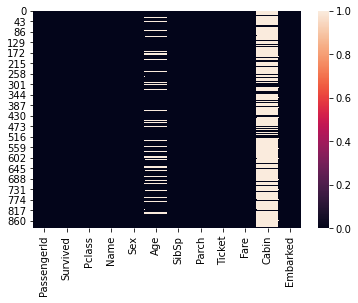

In [4]:
#in see which columns missing values present
sns.heatmap(data.isnull()) 

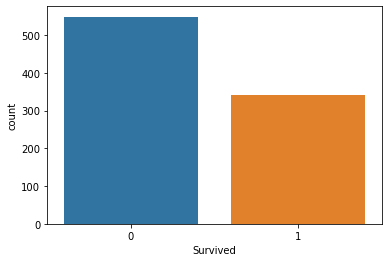

In [5]:
sns.countplot(x ='Survived',data =data)

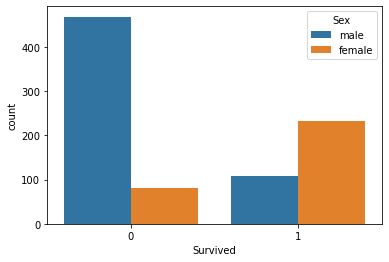

In [6]:
 sns.countplot(x ='Survived',hue ='Sex',data =data)

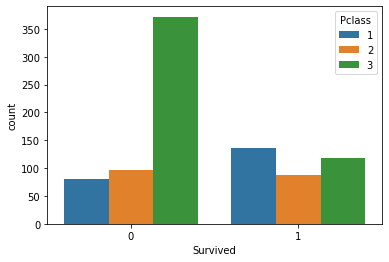

In [7]:
sns.countplot(x ='Survived',hue ='Pclass',data =data)

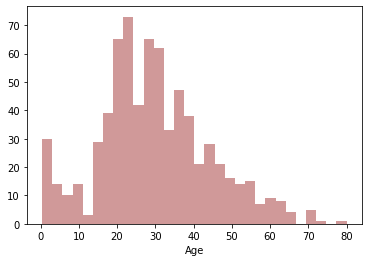

In [8]:
sns.distplot(data['Age'].dropna(),kde =False,color='darkred',bins =30)

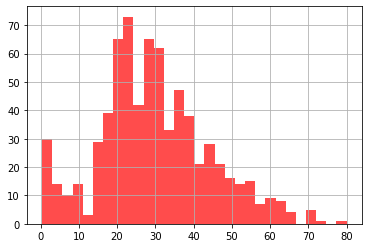

In [7]:
data['Age'].hist(bins =30,color ='red',alpha =0.7)

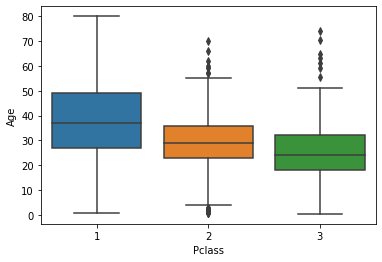

In [8]:
sns.boxplot(x ='Pclass',y ='Age',data =data)

In [9]:
def impute_age(cols):
    Age =cols[0]
    Pclass =cols[1]
    
    
    if pd.isnull(Age):

        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        
        else:
            return 24
    else:
        return Age

In [10]:
data["Age"] =data[["Age","Pclass"]].apply(impute_age,axis =1)

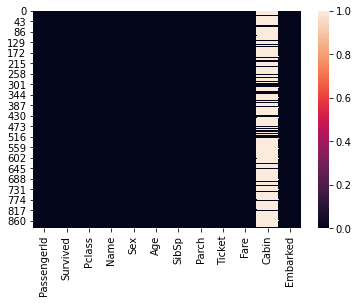

In [11]:
sns.heatmap(data.isnull())

In [12]:
data = data.drop("Cabin", axis=1)

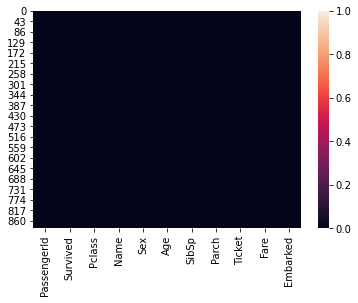

In [13]:
sns.heatmap(data.isnull())

In [17]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [18]:
data.shape

(891, 11)

# Gaussion transformation

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [132]:
data =pd.read_csv("datasets_13931_18775_titanic_train.csv",usecols =["Age","Fare","Survived"])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [133]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

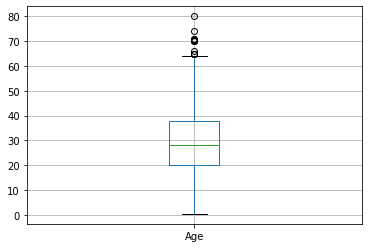

In [134]:
data.boxplot(column ="Age")

In [135]:
data["Age"].median()

28.0

In [138]:
data["Age"].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [140]:
random_sample =data["Age"].dropna().sample(data["Age"].isnull().sum(),random_state =0)

In [141]:
random_sample

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [136]:
data["Age"].isnull().sum()

177

In [142]:
random_sample.index = data[data["Age"].isnull()].index

In [143]:
random_sample.index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [151]:
 data.loc[[data"Age"].isnull(), "Age"+'_random'] 

SyntaxError: invalid syntax (<ipython-input-151-7ef51f8b486e>, line 1)

# missing values -feature engineering

In [15]:
import pandas as pd    
import numpy as np

In [16]:
data =pd.read_csv("datasets_13931_18775_titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
data.shape

(891, 12)

In [19]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## missing data not at random(mnar):systematic missing values

In [20]:
data["Cabin_null"] =np.where(data["Cabin"].isnull(),1,0)

#find the percentage of null values
data["Cabin_null"].mean()

0.7710437710437711

In [21]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [22]:
data.groupby(["Survived"])["Cabin_null"].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

##missing at random(MAR)

In [23]:
men ....hide their salary
women.....hide their age

SyntaxError: invalid syntax (<ipython-input-23-2728710a85e8>, line 1)

In [ ]:
### All the hendaling missing values
1 . mean /median / mode replacement
2 . random sample imputation
3 . capturing NAN values with  a new feature
4 . end of distribution imputation
5 .frequent categories imputation
6 .arbitray imputation


#### mean /median/mode imputation
when should we apply?
mean/median imputation has the assumption that tha data are missing completelly at random(MCAR).
we solve this by replacing the NAN with the most frequent occurance of the variable

In [24]:
data =pd.read_csv("datasets_13931_18775_titanic_train.csv",usecols =["Age","Fare","Survived"])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [26]:
def impute_nan(df,variable):
    median =df[variable].median()
    df[variable+"_median"] =df[variable].fillna(median)

In [27]:
impute_nan(data,"Age")
data.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [28]:
data.isnull().mean()

Survived      0.000000
Age           0.198653
Fare          0.000000
Age_median    0.000000
dtype: float64

In [29]:
print(data["Age"].std())
print(data["Age_median"].std())

14.526497332334042
13.019696550973201


In [30]:
import matplotlib.pyplot as plt

In [31]:
fig =plt.figure()

<Figure size 432x288 with 0 Axes>

# advantage
1 easy to implement(robust to outliers)

#disvantage

1 change or distortion in original variance
2 impacts correlation

# random sample imputation

AIM ::random sample imputation cosists of taking random observation from the dataset and we use this observation to replace the nan values
        
when should it be use?
it assumes that the data are missing completely at random (mcar)

In [32]:
data.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [33]:
data.isnull().mean()

Survived      0.000000
Age           0.198653
Fare          0.000000
Age_median    0.000000
dtype: float64

In [34]:
data["Age"].isnull().sum()

177

In [35]:
data["Age"].dropna().sample(data["Age"].isnull().sum(),random_state =0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [36]:
def impute_nan(df,variable):
    df[variable+"_random"] =df[variable]
    random_sample =df[variable].dropna().sample(df[variable].isnull().sum(),random_state =0)
    ##pandas need to have same index in order to merage the dataset
    random_sample.index =df[df(variable).isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"]=random_sample